Neural Network for Classification Task in PyTorch
 
Name:   Duncan Conly 

UA ID:   010958878

In [1]:
# We import the library torch for the PyTorch library. Torch.nn is for building neural networks. Torch Vision is for using computer vision in PyTorch.
# Torchvision.transforms is for image preprocessing. Numpy is imported for doing some more computing with data and matplotlib.pyplot is for making plots and visualizing data.

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Download some training data. MNIST in this example
# More about datasets available in Pytorch here: https://pytorch.org/vision/stable/datasets.html

# From torchvision, this code is importing the MNIST data set which has images that are 28x28 pixels. We set the root to '.', which means to store the data set in the current
# directory. It then sets train to true, which loads the training set instead of the test set. Transform is set to transforms.ToTensor() which applies a transform to the images.
# Downloads being true means just to download the data set if it isn't already.

train_dataset = torchvision.datasets.MNIST(root = '.', train=True, transform=transforms.ToTensor(),download=True)

In [3]:
# The code first prints out the data set in the shape of how many entries there are in the data, and the n x m matrix is 28 pixels by 28 pixels.
# It then prinst what the maximum number a single pixel value is in the set, then the next print outputs the lowest single pixel value.

# Lets look at some charatersitics of the training data
print('Input data shape is:', train_dataset.data.shape)
print('Maximum value of entry in data is:', train_dataset.data.max())
print('Minimum value of entry in data is:', train_dataset.data.min())



Input data shape is: torch.Size([60000, 28, 28])
Maximum value of entry in data is: tensor(255, dtype=torch.uint8)
Minimum value of entry in data is: tensor(0, dtype=torch.uint8)


The sample data is: 
 tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 118, 219,
         166, 118, 118,   6,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 103, 242, 254, 254,
         254, 254, 254,  66,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0, 

Text(0.5, 1.0, 'Sample data image')

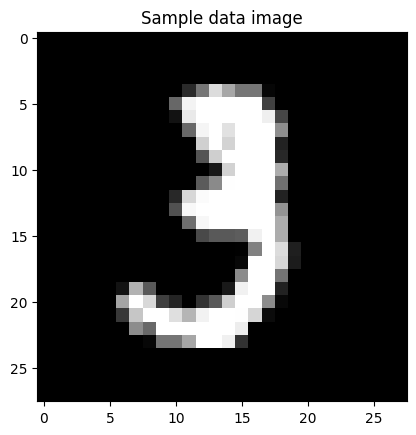

In [4]:
# Chose a sample from train data and print its value and also display as an image
# This code chooses the 11th image from the training set and makes that i, then it prints the raw pixel values of the 28 x 28 selected 11th image. 
# The plt.imshow then displays the image with a grayscale color selector using cmap.  Then we make the title of the plot "Sample data image". 
# When using the : operator, it means that you take all the rows and columns of each. Ex, if you use 2:, take every row after 2, but if you use 
# :3, take the first 3 rows.
i = 10
print('The sample data is: \n', train_dataset.data[i,:,:])
plt.imshow(train_dataset.data[i,:,:], cmap = 'gray')
plt.title('Sample data image')

In [5]:
# Labels/Targets of train dataset
# This set prints the shape of the labels, so it prints 60,000 since there are 60,000 labels. 
# We then print out the label for the image i, which is 11. So the label for image 11 is 3.

print('The shape of target is:', train_dataset.targets.shape)
print('The target value of ith train data sample above is:', train_dataset.targets[i] )

The shape of target is: torch.Size([60000])
The target value of ith train data sample above is: tensor(3)


In [6]:
# Get the test data as well
# This is the same as when we took the training set, but instead of saying train is True, we say it is false to get the test set which is 10,000 sets of data.
test_dataset = torchvision.datasets.MNIST(root = '.', train=False, transform=transforms.ToTensor(),download=True)

In [7]:
# Lets look at some charatersitics of the training data and thier targets
# The first line outputs the shape, which is 10,000 pictures, and has 28x28 pixel size. The max and min are then outputted, still 255 and 0 as they were earlier.
# The shape of the data which is the size is 10,000.

print('Input data shape is:', test_dataset.data.shape)
print('Maximum value of entry in data is:', test_dataset.data.max())
print('Minimum value of entry in data is:', test_dataset.data.min())
print('The shape of target is:', test_dataset.targets.shape)

Input data shape is: torch.Size([10000, 28, 28])
Maximum value of entry in data is: tensor(255, dtype=torch.uint8)
Minimum value of entry in data is: tensor(0, dtype=torch.uint8)
The shape of target is: torch.Size([10000])


In [8]:
# Lets build a simple Artificial Neural Netowrk Model
# In this section the code it first flattens the data set. The input size is set to the train_dataset.data.size(-1)* train_dataset.data.size(-2) which gets the width and the 
# height of the image and multiply them by eachother. Then it prints out the input size which is 784, because 28x28 = 784. Then, we define a model which creates a neural network 
# using the nn.Sequential function, that allows you to stack layers that will happen in sequence. It stacks the Linear layer that is the first fully connected layer, then
# running it through the ReLU, that applies a non- linear activation function. We then run it back through another fully connected layer that takes the 128 nodes down to 10 nodes. 
input_size = train_dataset.data.size(-1)*train_dataset.data.size(-2) # We flatten image to a vector in Fully connected NN, so find length of data
print(input_size)
model = nn.Sequential(
      nn.Linear(input_size,128), # train from the input size, down to 128 nodes
      nn.ReLU(),
      #nn.Linear(256,128),
      #nn.ReLU(),
      nn.Linear(128,10) # then train from 128 nodes to 10 nodes
)

784


In [9]:
# This is chosing which device to run the model on. It checks if you have a gpu that can run the model, if not, then use the cpu.
# It then prints out the device being used and all of the layers of the neural network model. It then sets the model to use the device.

# Choose Device
device = torch.device("cuda:0" if torch.cuda.is_available() else 'cpu')
print('The device being used is:', device)
model.to(device)

The device being used is: cpu


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
)

In [10]:
# For this section, we create the loss function for the classification tasks using the nn.CrossEntropyLoss().This measures the difference between predicted 
# class probabilities and the true class labels. The lower the value, the better the proformance. The optimizer function is used to update the models parameters during training.
# Adam is a popular optimization algorithm that stands for Adaptive Moment Estimation. It adapts the learning rate for each parameter individually. This is good for 
# training deep learning networks. It passes the models perameeters to the optimizer so it can be updated during backpropogation.

# Choose the Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [11]:
# In Deep Learning frameworks, learning parameters/optimization is done over batches.
# Data Loader generates such batches of data automatically, shuffles data, maps data tp 0-1 and other processing.
# Define batch size, call data loader for train data and test data

# This creates a batch size of 128, which sets the number of samples per batch during training and testind. The model will see 128 images at a time before updating the 
# weights. The train _loader is set equal to the train data set, the batch size, and the shuffling is turned on. Same with the test loader, besides it is loaded with the 
# test_data set. 

batch_size = 128
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle = True)
test_loader  = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle = True)

In [12]:
# Batch Example: Illustration how data loader works in Pytorch
# Lets set batch_size = 1 and check the data and target
# Note how the data is now mapped to (0,1)
# The first dimension = batch_size

# So first, we set the batch_example to the train set data. The batch size is set to 2 for each batch has 2 images. The for loop loops over the data loader, and prints
# the shape of the data, it outputs the shape of the target which is just 2 labels for each of the images. It then prints the max and minimum values. The maximum is 1 and
# and the minimum is 1 because the transforms.ToTensor() function was used on the data previously. We then print out the tensor data for the two images.


batch_example = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2, shuffle = True)
for input, target in batch_example:
  print('The shape of data  is:', input.shape) # the second variable (in this case 1) is the channel, the 2 is the batch size, and the data is 28 rows and 28 columns
  print('The shape of target is:', target.shape)
  print('Maximum value of entry in data is:', input.max())
  print('Minimum value of entry in data is:', input.min())
  print('The sample data input is:', input)
  break

The shape of data  is: torch.Size([2, 1, 28, 28])
The shape of target is: torch.Size([2])
Maximum value of entry in data is: tensor(1.)
Minimum value of entry in data is: tensor(0.)
The sample data input is: tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]])


In [13]:
# In this section, we are training the model for 10 passes through the training data, and we hav etwo numpy arrays that store the average training and test loss per epoch.
# The loop starts a new epoch, which initializes a training loss array. The nested loop then moves the images to the device, and flattens the images into 784 element vectors
# with the function .view(-1, input_size). It then sets the old gradients to zeor, does a forward pass that feeds the input through the model, alculates the loss, does a backward
# pass that computes the gradients. Then the optimizer is stepped through which updates the model weights. The train loss array is then added too. The nested loop is then over
# so we calculate the train loss average. The second nested for loop then feeds the test data through the model and calculates and stores the loss per batch. We then store 
# and print the results. We compute the average test loss for the epoch, stores both train and test losses in arrays for later plotting. It then prints the epoch.

# Define some training parameters, initlialize some variables to store results and train the model
num_epochs = 10
train_losses = np.zeros(num_epochs) # used to save loss at each epoch so we could see the loss curve and convergence
test_losses = np.zeros(num_epochs)

for n in range(num_epochs):
  train_loss = [] # train loss during each iteration
  for inputs, targets in train_loader:
    inputs, targets = inputs.to(device), targets.to(device) # data is moved to the device
    # Returns a new tensor with the same data as the :attr:`self` tensor but of a different :attr:`shape`.
    # 1st argument is number of rows, second argument is number of columns in new tensor
    # -1 means give me appropriate rows or columns depending on the dimension that is specified. 
    inputs = inputs.view(-1,input_size) 

    #The optimizer zero_grad() method sets the gradients of all optimized torch Tensors to zero.
    #This is useful to do before each backward pass, as it ensures that the gradients are not accumulating from previous iterations.
    optimizer.zero_grad()

    outputs = model(inputs) # Forward pass of the model
    loss = criterion(outputs,targets)

    loss.backward() # Backward pass of the model
    optimizer.step()

    train_loss.append(loss.item())

  # train loss and test loss for each epoch
  train_loss = np.mean(train_loss) # train loss for each epoch

  test_loss = []
  for inputs, targets in test_loader:
    inputs, targets = inputs.to(device), targets.to(device) # data is moved to the device
    inputs = inputs.view(-1,input_size)
    outputs = model(inputs)
    loss = criterion(outputs,targets)
    test_loss.append(loss.item())

  test_loss = np.mean(test_loss)

  # push train and test loss of each epcoh
  train_losses[n] = train_loss
  test_losses[n] = test_loss

  print(f'Epoch {n+1}/{num_epochs}, Train Loss: {train_loss:.2f}, Test Loss: {test_loss:.2f}')



Epoch 1/10, Train Loss: 0.42, Test Loss: 0.23
Epoch 2/10, Train Loss: 0.20, Test Loss: 0.16
Epoch 3/10, Train Loss: 0.14, Test Loss: 0.13
Epoch 4/10, Train Loss: 0.11, Test Loss: 0.11
Epoch 5/10, Train Loss: 0.09, Test Loss: 0.09
Epoch 6/10, Train Loss: 0.07, Test Loss: 0.09
Epoch 7/10, Train Loss: 0.06, Test Loss: 0.08
Epoch 8/10, Train Loss: 0.05, Test Loss: 0.08
Epoch 9/10, Train Loss: 0.04, Test Loss: 0.07
Epoch 10/10, Train Loss: 0.04, Test Loss: 0.07


Text(0.5, 1.0, 'Training and Test Loss')

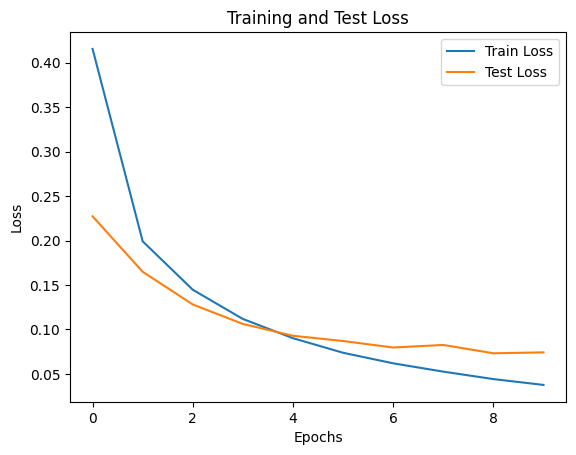

In [14]:
# We then print the train losses vs the testing loss. This shows if both losses are decreasing, the model is learning well. 

# plot train loss and test loss for each epoch
plt.plot(train_losses, label = 'Train Loss')
plt.plot(test_losses, label = 'Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Test Loss')



In [15]:
# This section calculates the training accuracy by comparing the models predicted class with the true labels for each of the training samples. We start a count for 
# correct predictions there are, and then we have a count for how many predictions were made. The for loop loops through the batches of training data for the DataLoader.
# It then sends the data ot the CPU and flattens the model. We then create an output fo rthe models raw presictions, and get the index of the max value along the first
# dimension. We then compare the predictions to the actual labels.


# Compute Training and Test Accuracy
# We pass training data and test data through the model we trained and calculate correct guesses in each case
# For Training Data
num_correct_train = 0
num_total_train = 0

for inputs, targets in train_loader:
  inputs, targets = inputs.to(device), targets.to(device)

  inputs = inputs.view(-1,input_size)

  # Pass train data in the model that is trained
  outputs = model(inputs)

  # Output is of size 1x numclass with predicted class having highest value. index with max val is the predicted class. #one hot encoding
  val, predictions = torch.max(outputs, 1)

  # Check if prediction is correct or not and update count if prediction is correct
  num_correct_train += (predictions == targets).sum().item()
  num_total_train += targets.shape[0]



In [16]:
# This section calculates the train accuracy by dividing the number that were correct by the total number, and outputs that number as a percent.

train_accuracy = num_correct_train/num_total_train
print(f'The Training Accuracy is {train_accuracy*100:.2f}%')

The Training Accuracy is 99.18%


In [17]:
# This code computes the test accuracy and stores all the model prediction and true labels to be evaluated later. We create counts for the test correctness and the 
# total number of tests. It stores all predicted labels, and all the true labels. In the for loop, it is looping through the batches of the test data set. It moves the data
# to the device, and flattens the images into 784 length vectors. It then gets the outputs as the models raw prediction scores for each of the classes. It then converts PyTorch 
# tensors to NumPy arrays and appends them to running arrays for a confusion matrix. It then compares predictions to true labels and adds to the correct array and the total array.

# Evaluate Model: Compute Training and Test Accuracy
# We pass training data and test data through the model we trained and calculate correct guesses in each case
# For Test Data

num_correct_test = 0
num_total_test = 0
predictions_test = np.array([]) #  numpy array to store predictions for entire test dataset. Will be used for confusion matrix later
targets_test = np.array([])   #  numpy array to store true targets for entire test dataset. Will be used for confusion matrix later
for inputs, targets in test_loader:
  inputs, targets = inputs.to(device), targets.to(device)

  inputs = inputs.view(-1,input_size)

  # Pass train data in the model that is trained
  outputs = model(inputs)

  # Output is of size 1x numclass with predicted class having highest value. index with max val is the predicted class. #one hot encoding
  val, predictions = torch.max(outputs,1)

  predictions_test = np.concatenate((predictions_test, predictions.cpu().numpy()))
  targets_test     = np.concatenate((targets_test,targets.cpu().numpy()))
  # Check if prediction is correct or not and update count if prediction is correct
  num_correct_test += (predictions == targets).sum().item()
  num_total_test += targets.shape[0]

In [18]:
# This then calculates the testing accuracy and outputs it as a percent.

test_accuracy = num_correct_test/num_total_test
print(f'The Test Accuracy is {test_accuracy*100:.2f}%')

The Test Accuracy is 97.76%


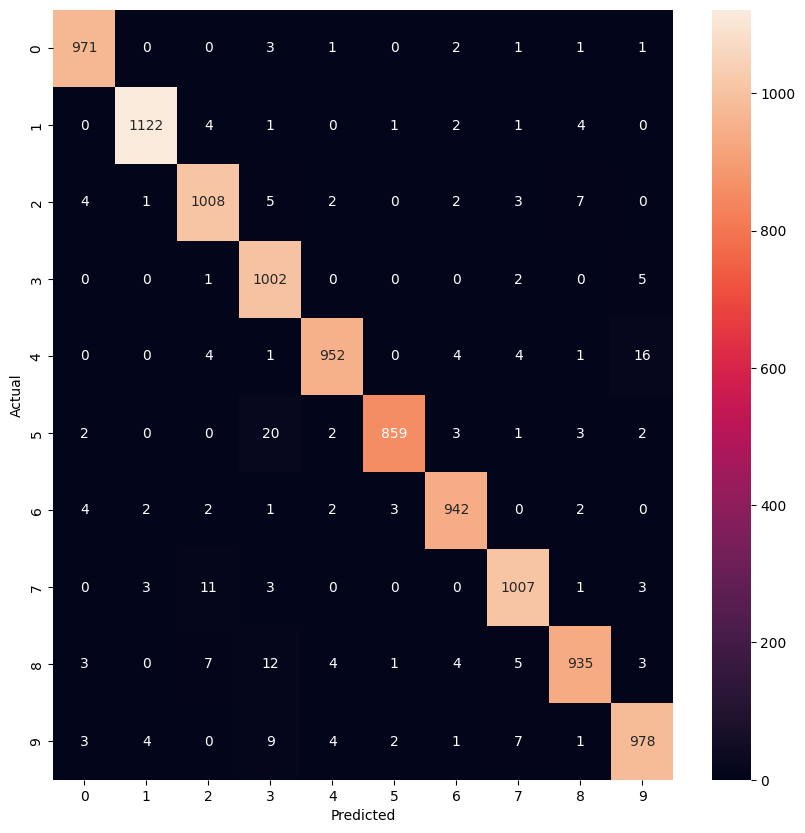

In [19]:
# It then generate a confustion matrix, which is a table that shows how well the model is classifying the test images. Each row represents the actual digit from the test data
# and each column represents the digit predicted by the model. The diagonal values show the number of correct prediction for each digit. Off diagonal values 
# show the misclassifications. This helps you understand where the model is making mistakes and which digits it confuses most often. 

# Create a Confusion matrix for Test Data Prediction and  actual Targets
# We will use confusion_matrix from sklearn
from sklearn.metrics import confusion_matrix # confusion matrix take predcited and actual target as input arguments
import seaborn as sns
class_labels = torch.unique(test_dataset.targets).numpy()
#class_lables = np.array2string(class_lables)

cm = confusion_matrix(targets_test, predictions_test)
# Confusion Matrix HeatMap without Normalization
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='.0f', xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)



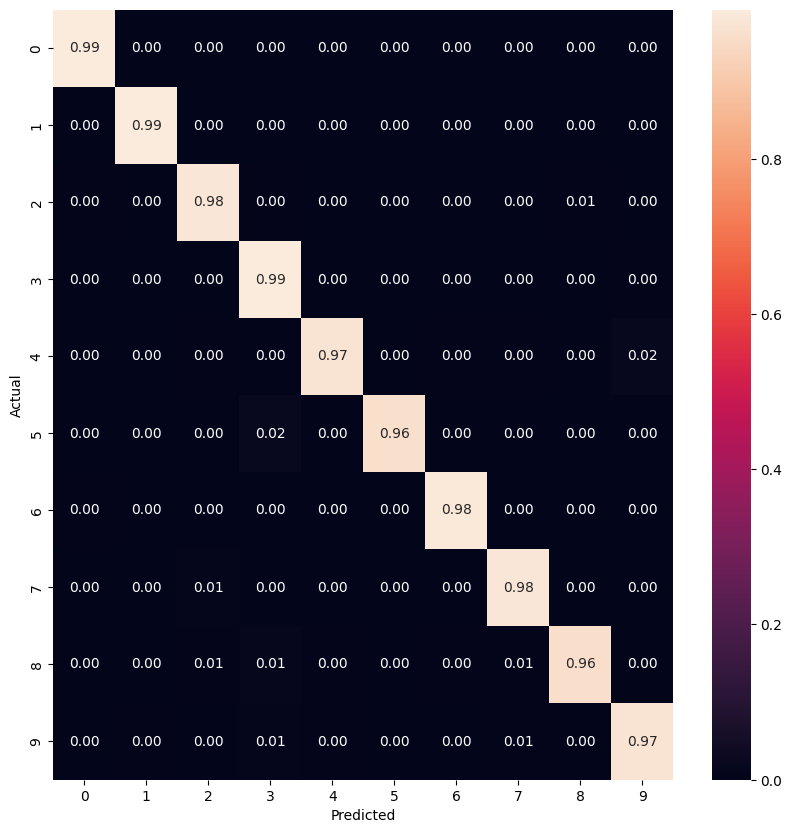

In [20]:
# This code creates a normalized confusion matrix heatmap that shows the percentage of correct and incorrect predictions. Each row represents the digit and 
# and each column the predicted digit, but the numbers are not between 0 and 1. The diagonal values tell you what proportion of each digit was classified correctly, 
# while the other values show which digit the model commonly confuses. 


# Confusion Matrix HeatMap with Normalization
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)